In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv('./Algerian_Forest_Fire_Cleaned_Dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# Feature Selection

In [3]:
## droping day,month,year 
df.drop(['day','month','year'],axis=1,inplace=True)

In [4]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
## Feature Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [7]:
df['Classes'].value_counts()

Classes
1    137
0    104
Name: count, dtype: int64

In [8]:
## Dependent and Independent Feature 
X = df.drop('FWI',axis=1)
y = df['FWI']

In [9]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [10]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [11]:
## train test split 
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
X_train.shape

(180, 11)

In [13]:
X_test.shape

(61, 11)

In [14]:
## Feature Selection based on correlation 
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.658884,-0.283527,-0.329838,0.695701,0.490708,0.368994,0.609129,0.461458,0.529054,0.254575
RH,-0.658884,1.000000,0.255366,0.218938,-0.636912,-0.383872,-0.201891,-0.687823,-0.330053,-0.429008,-0.388707
Ws,-0.283527,0.255366,1.000000,0.315301,-0.191422,-0.012974,0.078715,0.009717,0.020902,-0.088843,-0.199183
Rain,-0.329838,0.218938,0.315301,1.000000,-0.532895,-0.266456,-0.284452,-0.324347,-0.277710,-0.343453,-0.104973
FFMC,0.695701,-0.636912,-0.191422,-0.532895,1.000000,0.598514,0.504184,0.733343,0.584447,0.763900,0.266560
DMC,0.490708,-0.383872,-0.012974,-0.266456,0.598514,1.000000,0.878344,0.665321,0.984121,0.589805,0.207122
DC,0.368994,-0.201891,0.078715,-0.284452,0.504184,0.878344,1.000000,0.508745,0.947259,0.502396,-0.084035
ISI,0.609129,-0.687823,0.009717,-0.324347,0.733343,0.665321,0.508745,1.000000,0.628279,0.727029,0.282773
BUI,0.461458,-0.330053,0.020902,-0.277710,0.584447,0.984121,0.947259,0.628279,1.000000,0.578800,0.104204
Classes,0.529054,-0.429008,-0.088843,-0.343453,0.763900,0.589805,0.502396,0.727029,0.578800,1.000000,0.203781


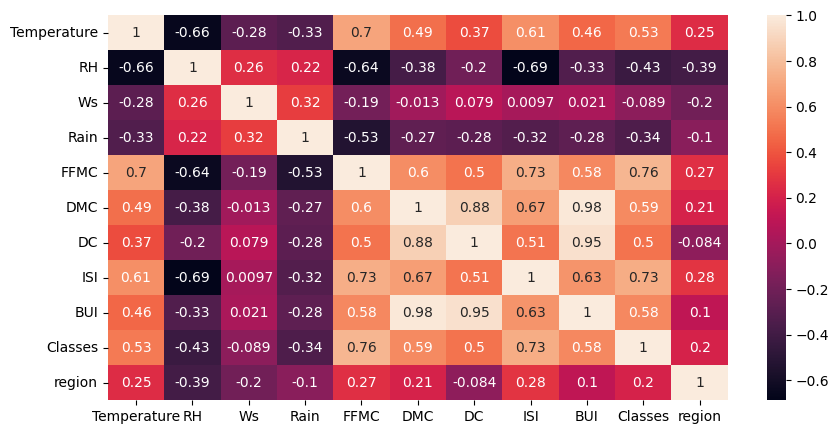

In [15]:
## check for multicollinearity
plt.figure(figsize=(10,5))
corr = X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [16]:
## below function is aimed to find column which is more correlated a=than given thresold value 
## function basically use empty set and check all column and add column in set which contains more corr than thresold in corr_col and return set 
def correlation(dataset,thresold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thresold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [17]:
## now we save more corr feature and drop it from our dataset 
corr_feature = correlation(X_train,0.85)

## corr_feature contains columns of X_train which has more than 85% correlation 
## thresold is define by domain expert(means product manager)

In [18]:
## dropping ccorr_feature
X_train.drop(corr_feature,axis=1,inplace=True)
X_test.drop(corr_feature,axis=1,inplace=True)

In [19]:
X_train.head()    ## we can see that features like DC,ISI,BUI are removed which is more corr than thresold 85 %

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
140,32,55,14,0.0,86.2,8.3,5.0,1,1
190,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


## Feature scalling or Standarization


In [20]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
X_test_scaled

array([[-2.97766974e-01,  1.07933967e-01, -2.07827688e-01,
        -3.65627684e-01,  6.27891908e-01, -3.13314774e-02,
         2.36939534e-01,  8.94427191e-01, -9.78019294e-01],
       [ 2.30292684e-01, -5.52886237e-01, -9.41337175e-01,
        -3.65627684e-01,  7.33676767e-01, -3.79259218e-01,
         4.04378576e-01,  8.94427191e-01, -9.78019294e-01],
       [-2.97766974e-01,  6.36590129e-01, -5.74582432e-01,
        -3.65627684e-01,  4.51583810e-01, -5.08720702e-01,
        -2.17537867e-01,  8.94427191e-01,  1.02247472e+00],
       [ 7.58352342e-01, -6.18968257e-01,  5.25681799e-01,
        -1.18024286e-01,  1.69490852e-01,  4.94605804e-01,
        -4.80656363e-01,  8.94427191e-01,  1.02247472e+00],
       [-5.61796802e-01,  1.74015987e-01, -5.74582432e-01,
        -3.65627684e-01,  5.36211697e-01,  1.14312693e-01,
        -5.00988246e-02,  8.94427191e-01,  1.02247472e+00],
       [ 1.81447166e+00,  1.07933967e-01, -2.40835615e+00,
         2.28620470e-01, -2.81857880e-01, -2.336150

## box plot to understand the effect of standar scaler 


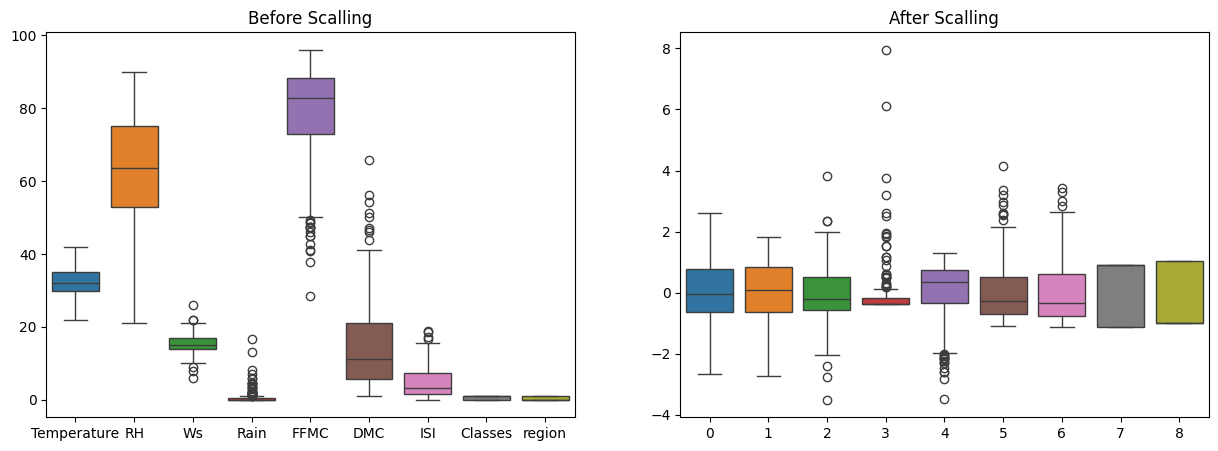

In [22]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scalling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scalling')
plt.show()

## we can see that there is more outliers before scalling

## Linear Regression Model 

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , mean_absolute_error,r2_score

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled) 

## errors 
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean Squared Error : {mse}",f"Mean Absolute Error : {mae}",f"r2 Score (accuracy) : {r2}",sep='\n')

Mean Squared Error : 0.9234694988901772
Mean Absolute Error : 0.6612623700751249
r2 Score (accuracy) : 0.9836843464471655


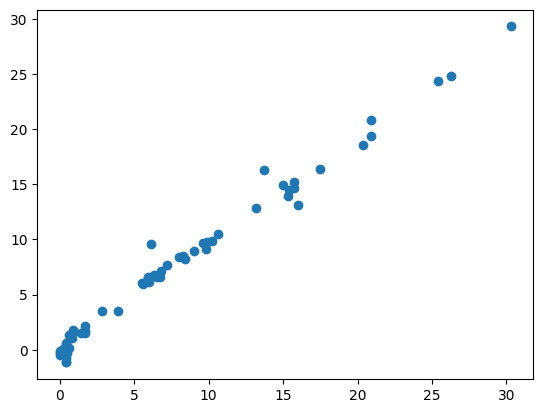

In [24]:
## scatter 
plt.scatter(y_test,y_pred)
plt.show()

# Lasso Rigression 

Mean Squared Error : 2.982404412948803
Mean Absolute Error : 1.2522655115292307
r2 Score (Accuracy) : 0.9473075426805143


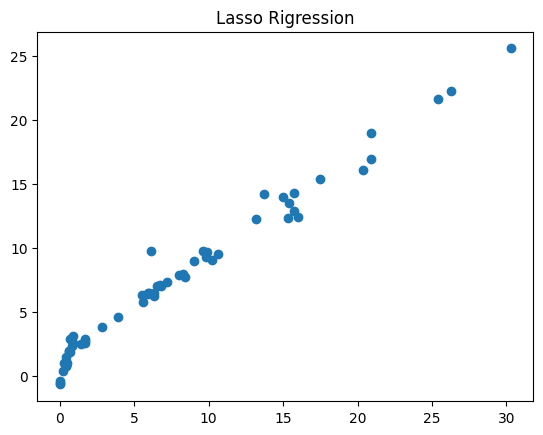

In [25]:
from sklearn.linear_model import Lasso 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

# lasso model 
l1_rig = Lasso()
l1_rig.fit(X_train_scaled,y_train)
y_lasso_pred = l1_rig.predict(X_test_scaled)

## errors 
print(f"Mean Squared Error : {mean_squared_error(y_test,y_lasso_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_lasso_pred)}")
print(f"r2 Score (Accuracy) : {r2_score(y_test,y_lasso_pred)}")

## visualization 
plt.scatter(y_test,y_lasso_pred)
plt.title('Lasso Rigression')
plt.show()


# Ridge Regression 

Mean Squared Error : 0.9607396580929614
Mean Absolute Error : 0.6864171979933394
r2 Score (Accuracy) : 0.9830258655702742


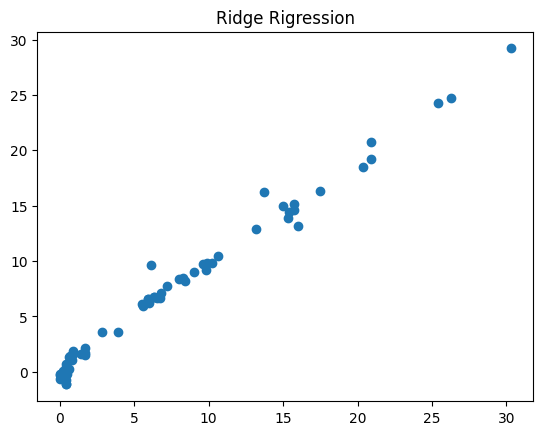

In [26]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

# Ridge model 
l2_rig = Ridge()
l2_rig.fit(X_train_scaled,y_train)
y_ridge_pred = l2_rig.predict(X_test_scaled)

## errors 
print(f"Mean Squared Error : {mean_squared_error(y_test,y_ridge_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_ridge_pred)}")
print(f"r2 Score (Accuracy) : {r2_score(y_test,y_ridge_pred)}")

## visualization 
plt.scatter(y_test,y_ridge_pred)
plt.title('Ridge Rigression')
plt.show()


In [27]:
## We can see Accuracy difference in lasso and ridge 

# ElasticNet Regression

Mean Squared Error : 6.658943135850641
Mean Absolute Error : 1.924851265262548
r2 Score (Accuracy) : 0.8823512748789929


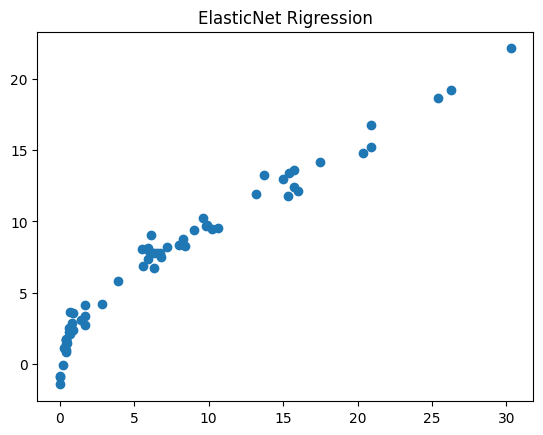

In [28]:
from sklearn.linear_model import ElasticNet 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

# ElasticNet model 
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_elastic_pred = elastic.predict(X_test_scaled)

## errors 
print(f"Mean Squared Error : {mean_squared_error(y_test,y_elastic_pred)}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test,y_elastic_pred)}")
print(f"r2 Score (Accuracy) : {r2_score(y_test,y_elastic_pred)}")

## visualization 
plt.scatter(y_test,y_elastic_pred)
plt.title('ElasticNet Rigression')
plt.show()

In [29]:
## We can see Accuracy difference in lasso and ridge and ElasticNet Regression 

## Hyper Perameter Tunning

# Lasso With Cross Validation

In [30]:
from sklearn.linear_model import LassoCV 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 

## Lasso with Cross Validation
lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [31]:
# used alpha parameter value which is randomly selected by model 
lassoCV.alpha_


0.044498635426263554

In [32]:
## model can select below aplha values 
lassoCV.alphas_

array([6.76339692, 6.3075666 , 5.88245772, 5.48599976, 5.11626174,
       4.77144282, 4.44986354, 4.14995763, 3.87026438, 3.60942151,
       3.36615858, 3.13929076, 2.92771307, 2.73039501, 2.54637552,
       2.37475833, 2.21470757, 2.06544369, 1.9262397 , 1.79641759,
       1.67534506, 1.56243241, 1.45712969, 1.35892403, 1.2673371 ,
       1.18192282, 1.10226518, 1.02797619, 0.95869404, 0.89408127,
       0.83382318, 0.77762629, 0.72521688, 0.67633969, 0.63075666,
       0.58824577, 0.54859998, 0.51162617, 0.47714428, 0.44498635,
       0.41499576, 0.38702644, 0.36094215, 0.33661586, 0.31392908,
       0.29277131, 0.2730395 , 0.25463755, 0.23747583, 0.22147076,
       0.20654437, 0.19262397, 0.17964176, 0.16753451, 0.15624324,
       0.14571297, 0.1358924 , 0.12673371, 0.11819228, 0.11022652,
       0.10279762, 0.0958694 , 0.08940813, 0.08338232, 0.07776263,
       0.07252169, 0.06763397, 0.06307567, 0.05882458, 0.05486   ,
       0.05116262, 0.04771443, 0.04449864, 0.04149958, 0.03870

In [33]:
## total no of mse errors = total cross validation*No of alpha tried 
lassoCV.mse_path_

array([[45.97999642, 40.13095114, 36.98993305, 81.69701823, 65.62124421],
       [40.95299205, 35.59811105, 31.70057291, 81.69701823, 62.66839123],
       [35.99582012, 31.55864898, 27.19334305, 75.40519   , 56.13632957],
       [31.66759028, 28.01909758, 23.36010162, 68.5789962 , 50.43861118],
       [27.88746209, 24.91622358, 20.10717175, 62.55546623, 45.46767167],
       [24.58509981, 22.1947383 , 17.35355251, 57.2358791 , 39.93534955],
       [21.699139  , 19.80649966, 15.0290935 , 52.53397961, 34.93788837],
       [19.1764982 , 17.70947235, 13.0731448 , 48.18143521, 30.589185  ],
       [16.97059179, 15.86718389, 11.43319977, 42.36133476, 26.8049408 ],
       [15.04096287, 14.24763524, 10.06410811, 37.28523484, 23.51133962],
       [13.35237037, 12.82297489,  8.9266724 , 32.85701281, 20.64545274],
       [11.8741132 , 11.56890078,  7.98712488, 28.99317747, 18.1512579 ],
       [10.57931661, 10.46420331,  7.21633837, 25.62105218, 15.98044886],
       [ 9.44493951,  9.49036739,  6.5

Mean Absolute error : 0.6948520208585799
r2 score (Accuracy) : 0.9828599317980785


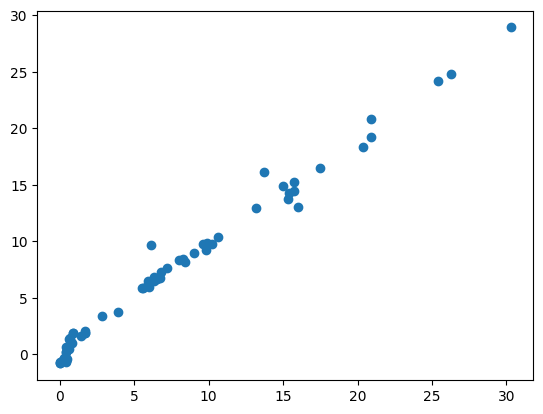

In [34]:
## prediction 
y_lassocv_pred = lassoCV.predict(X_test_scaled)

## errors 
print(f"Mean Absolute error : {mean_absolute_error(y_test,y_lassocv_pred)}")
print(f"r2 score (Accuracy) : {r2_score(y_test,y_lassocv_pred)}")

# Visualization 
plt.scatter(y_test,y_lassocv_pred)

In [35]:
## we can see here a good linear relationship 

# Ridge with Cross Validation 

Mean Absolute error : 0.888459893163532
r2 score (Accuracy) : 0.9756362083772786


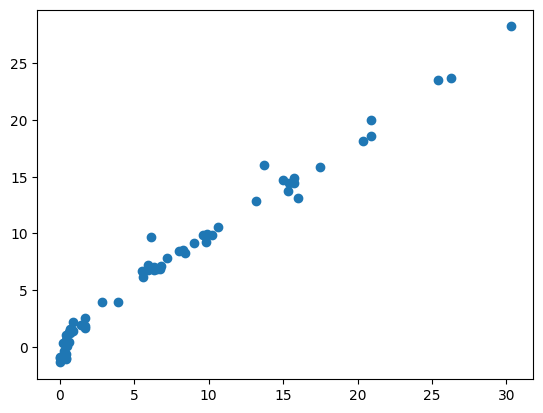

In [36]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

## prediction 
y_ridgecv_pred = ridgecv.predict(X_test_scaled)

## errors 
print(f"Mean Absolute error : {mean_absolute_error(y_test,y_ridgecv_pred)}")
print(f"r2 score (Accuracy) : {r2_score(y_test,y_ridgecv_pred)}")

# Visualization 
plt.scatter(y_test,y_ridgecv_pred)


In [37]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [38]:
## get perams basically used to see all perameters that used in model 
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## ElasticNet with Cross Validation

Mean Absolute error : 0.7523532380645858
r2 score (Accuracy) : 0.9811284001563361


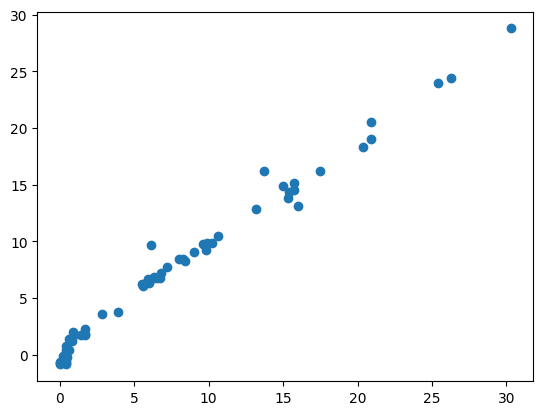

In [39]:
from sklearn.linear_model import ElasticNetCV 

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)

## prediction 
y_elasticcv_pred = elasticcv.predict(X_test_scaled)

## errors 
print(f"Mean Absolute error : {mean_absolute_error(y_test,y_elasticcv_pred)}")
print(f"r2 score (Accuracy) : {r2_score(y_test,y_elasticcv_pred)}")

# Visualization 
plt.scatter(y_test,y_elasticcv_pred)


In [40]:
## We pickle model which has good and high accuracy , and also pickle sStandardScaler preprocessing model 

In [41]:
import pickle 

In [42]:
## here ridge model is good 
ridge_model = pickle.dump(l2_rig,open('l2_rig.pkl','wb')) 

In [43]:
## scaler model pickeling 
scaler = pickle.dump(scaler,open('scaler.pkl','wb'))